In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import transform
import random


In [30]:
def subplot(rows,cols,images,titles):
    plt.figure(figsize=[20,40])

    i=1
    while(i<=rows*cols):
        plt.subplot(rows,cols,i)
        plt.imshow(images[i-1],cmap=plt.cm.gray)
        plt.title(titles[i-1])
        i+=1
    plt.show()


In [5]:
def generate_gaussian_noise(img,mean,var):
    sigma=np.sqrt(var)
    gaussian = np.random.normal(mean, sigma, (img.shape[0],img.shape[1])) 

    noise = np.zeros_like(img, np.float32)
    if len(img.shape) == 2:
        noise = img + gaussian
    else:
        noise[:, :, 0] = img[:, :, 0] + gaussian
        noise[:, :, 1] = img[:, :, 1] + gaussian
        noise[:, :, 2] = img[:, :, 2] + gaussian
    return noise

In [6]:
def convol2d(image,kernel):
    kernel=np.flip(np.flip(kernel,axis=0),axis=1)
    output=np.zeros_like(image)
    image_pad= np.pad(image,(kernel.shape[0]//2,kernel.shape[1]//2), 'constant', constant_values=(0, 0))
    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            output[x][y] = (kernel*image_pad[x:x+kernel.shape[0],y:y+kernel.shape[1]]).sum()
    return output
    

def dimension(image,kernel):
    
    if len(image.shape) != 2:
        output=np.zeros_like(image)
        for dim in range(image.shape[2]):
            output[:,:,dim] = convol2d(image[:,:,dim],kernel)
    else:
          output=convol2d(image,kernel)

    return output
    

In [7]:
def MSE (original_image,changed_image):
    err = np.sum((original_image.astype("float") - changed_image.astype("float")) ** 2)
    err /= float(original_image.shape[0] * original_image.shape[1])
    return err

def absolute_difference (original_image,changed_image):
    abs_diff = np.sum(abs(original_image.astype("float") - changed_image.astype("float")))
    return abs_diff


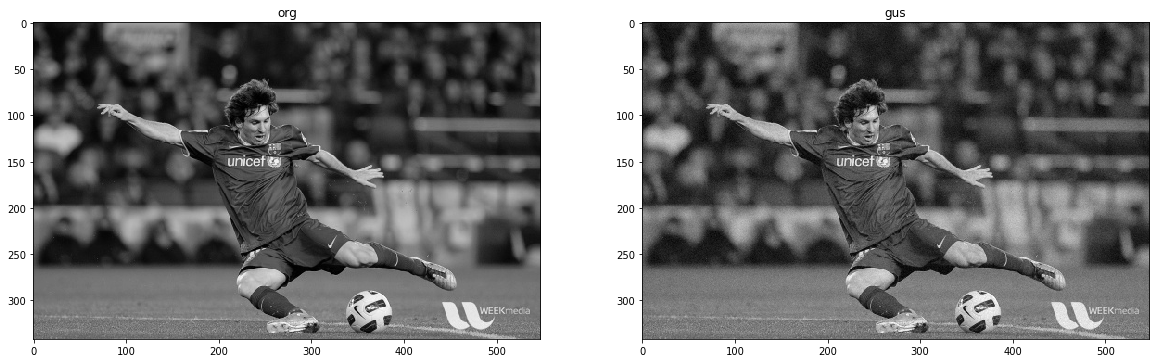

In [8]:
img=cv2.imread('messi.jpg',0)
# img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gaus=generate_gaussian_noise(img,0,25)
image_equalized=gaus/np.max(np.abs(gaus))
subplot(1,2,[img,image_equalized],['org','gus'])

# noise reduction, histogram, absolut difference and MSE


In [9]:
box_kernel=np.array([[1,1,1],[1,1,1],[1,1,1]])/9
gaussian_kernel = np.array([[1,2,1] , [2,4,2],[1,2,1]])/16
image_box=dimension(gaus,box_kernel)
image_gaus=dimension(gaus,gaussian_kernel)

import scipy.signal #for comparsion my result
scipy_image_box=scipy.signal.convolve2d(gaus,box_kernel,'same')
scipy_image_gaus=scipy.signal.convolve2d(gaus,gaussian_kernel,'same')


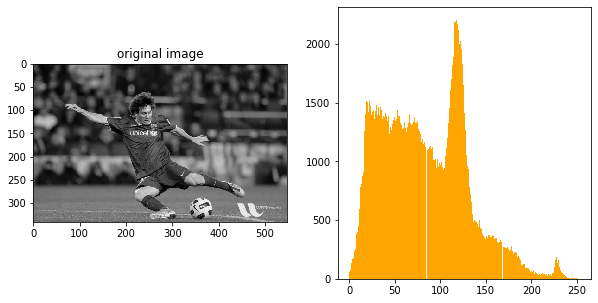

MSE: 0.0


In [10]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
# plt.imshow(img)
plt.title('original image')
plt.subplot(1,2,2)

plt.hist(img.ravel(), bins = 256,color = 'orange')

plt.show()
print('MSE:', MSE(img,img))

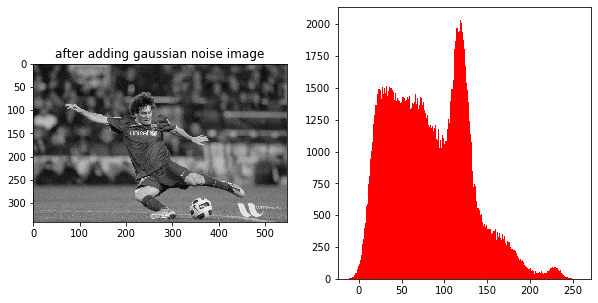

____________________________________________
absolute difference: 747368.5577676949
MSE: 25.00209818815868
____________________________________________


In [11]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(gaus,cmap='gray')
# plt.imshow(gaus)
plt.title('after adding gaussian noise image')

plt.subplot(1,2,2)

plt.hist(gaus.ravel(), bins = 256,color = 'red')

plt.show()
print('____________________________________________')
print('absolute difference:', absolute_difference(img,gaus))
print('MSE:', MSE(img,gaus))
print('____________________________________________')

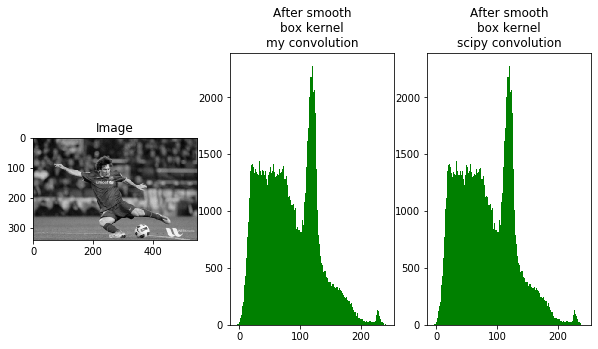

____________________________________________
absolute difference: 719070.2489046489
MSE: 63.70436782363069
cv2 MSE: 63.70436782363069
____________________________________________


In [12]:
plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.imshow(image_box,cmap='gray')
# plt.imshow(image_box)
plt.title('Image')

plt.subplot(1,3,2)
plt.hist(image_box.ravel(), bins = 256,color = 'Green')
plt.title('After smooth\nbox kernel\nmy convolution')

plt.subplot(1,3,3)

plt.hist(scipy_image_box.ravel(), bins = 256,color = 'Green')
plt.title('After smooth\nbox kernel\nscipy convolution')

plt.show()
print('____________________________________________')
print('absolute difference:', absolute_difference(img,image_box))
print('MSE:', MSE(img,image_box))
print('cv2 MSE:', MSE(img,scipy_image_box))
print('____________________________________________')

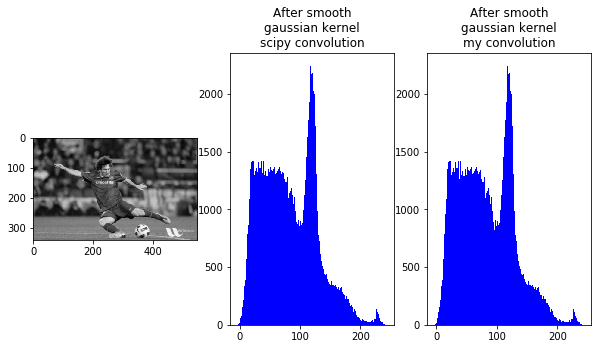

____________________________________________
absolute difference: 630429.2713901341
MSE: 41.89587589992119
cv2 MSE: 41.89587589992119
____________________________________________


In [13]:
plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.imshow(image_gaus,cmap='gray')
# plt.imshow(image_gaus)
plt.subplot(1,3,2)
plt.hist(image_gaus.ravel(), bins = 256,color = 'blue')
plt.title('After smooth\ngaussian kernel\nscipy convolution')
plt.subplot(1,3,3)
plt.hist(scipy_image_gaus.ravel(), bins = 256,color = 'blue')

plt.title('After smooth\ngaussian kernel\nmy convolution')


plt.show()
print('____________________________________________')
print('absolute difference:', absolute_difference(img,image_gaus))
print('MSE:', MSE(img,image_gaus))
print('cv2 MSE:', MSE(img,scipy_image_gaus))
print('____________________________________________')

# EX - 4 - Rotate image 

In [14]:
def rotate(xr,yr,teta,mid_x,mid_y):
    
    cos_angle = np.cos(np.deg2rad(teta))
    sin_angle = np.sin(np.deg2rad(teta))
    
    k1 = xr - mid_x - mid_x*cos_angle + mid_y*sin_angle 
    k2 = yr - mid_y - mid_x*sin_angle - mid_y*cos_angle
    
    x = -1*(k2 + k1*(cos_angle/sin_angle))*sin_angle
    y = (k1 + x*cos_angle)/sin_angle
    
    return(int(x), int(y))


def dimension(image, teta):
    output=np.zeros_like(image)

    if len(image.shape) != 2:
        rows, cols, dims = output.shape
        mid_x, mid_y = int(rows/2), int(cols/2)
        for row in range(rows):
            for col in range(cols):
                for dim in range(dims):
                    
                    x, y = rotate(row, col, teta, mid_x, mid_y)

                    if (0 <= x < rows) and (0 <= y < cols):
                        output[row, col, dim] = img[x, y, dim] 
    else:
        
        rows, cols = new_img.shape
        mid_x, mid_y = int(rows/2), int(cols/2)
        for row in range(rows):
            for col in range(cols):
                x, y = rotate2(row, col, teta, mid_x, mid_y)

                if (0 <= x < rows) and (0 <= y < cols):
                    output[row, col] = img[x, y] 
#     return output
    return np.flip(output, axis=0)

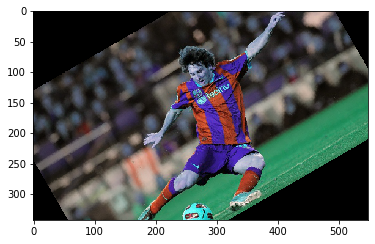

In [15]:
img=cv2.imread('messi.jpg')#read as gray scale
new_img=dimension(img,-30)
plt.imshow(new_img)
plt.show()

# Practice 
## static Augmentation class

In [16]:
class augmentation(object):
    @staticmethod
    def Flip(img, axis):
        return cv2.flip(img,axis)

    @staticmethod
    def Rotate(img, degree, resize = False):
        '''Return: ndarray format '''
        return transform.rotate(img, degree, resize)
    
    @staticmethod   
    def GaussianBlur(img, ksize,sigmaX):
        return cv2.GaussianBlur(img, ksize,sigmaX)
    
    @staticmethod   
    def MedianBlur(img, ksize):
        img = np.uint8(img)

        return cv2.medianBlur(img, ksize)
    
    @staticmethod   
    def Zoom(img, position, zoom_scale):

        h,w=img.shape[:2]#orignal
        
        if zoom_scale < 0:
            zoom_scale = 1/abs(zoom_scale)
        if zoom_scale == 1:
            return img
        
        width = int(img.shape[1] * zoom_scale)
        height = int(img.shape[0] * zoom_scale)
        dim = (width, height)
        

        # resize image
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

        

        #crop
        half_height = h/2
        half_width = w/2

        position = [element * zoom_scale for element in position]


        start_crop_width = augmentation.cal_lenght(position[0], half_height, True)
        end_crop_width = augmentation.cal_lenght(position[0], half_height)

        strat_crop_height = augmentation.cal_lenght(position[1], half_height, True)
        end_crop_height = augmentation.cal_lenght(position[1], half_height)


        start_position = (start_crop_width, strat_crop_height)
        end_position = (end_crop_width, end_crop_height)
        croped = augmentation.Crop(resized, start_position, end_position)
        

        return croped
    
    @staticmethod   
    def Crop(img, start_position, end_position):
        # crop_img = np.zeros_like(img)
        start_position, end_position = augmentation.Check_boundary(img, start_position, end_position)        
        crop_img = img[start_position[0]:end_position[0], start_position[1]:end_position[1]]
        return crop_img
    
    @staticmethod   
    def Check_boundary (img, start_position, end_position):
        height, width  = img.shape[:2]
        s_y, s_x  = start_position
        e_y, e_x  = end_position
        
        s_x, e_x = min(s_x,e_x), max(s_x,e_x)
        s_y, e_y = min(s_y, e_y), max(s_y, e_y)

        s_x = augmentation.cal_boundary(s_x,width)
        e_x = augmentation.cal_boundary(e_x,width)

        s_y = augmentation.cal_boundary(s_y,height)
        e_y = augmentation.cal_boundary(e_y,height)
 
        
        start_position =int(s_y), int(s_x)
        end_position = int(e_y), int(e_x)   
        
        return start_position, end_position

    @staticmethod
    def cal_boundary(point, lim):
        if point < 0 or point > lim:
            if point < 0:
                point = 0
            else:
                point = lim - 1
        return point

    @staticmethod
    def cal_lenght (point, lenght, start_point = False):
        if start_point:
            lenght = (-1) * lenght
        return int(point + lenght)

    

# Couldn't understand instruction.
# I made 2 version of this class
## augmentation_test_by_ratio and augmentation_test_by_weighted
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

# augmentation_test_by_ratio:
## N - number of augmentation
## M - ratio of division for each augmentation
### The function generate will create as a size of 'total' parameter images, each image transform by 1 augmentation


In [17]:
class augmentation_test_by_ratio(augmentation):      
    def __init__(self, image, N, M):
        self.image = image
        self.choices = N
        inner_methods = ['cal_lenght', 'cal_boundary', 'Check_boundary']
        self.augmentations_list = [func for func in dir(augmentation) if callable(getattr(augmentation, func)) 
                        and not func.startswith("__") and func not in inner_methods ]
        self.weighted = np.array(M) / np.sum(M)

    def generate(self, total):
        image_augmentations = np.random.choice(self.augmentations_list, self.choices, replace = False)

        ratio = np.round(self.weighted * total)
        augmentations_amount = zip(image_augmentations, ratio)
        all_images = []
        all_titles = []
        for augmentation_amount in augmentations_amount:
            name, amount = augmentation_amount[:2]
            im, tit = self.switchCase(name, int(amount))
            tup = zip(im, tit)
            for t in tup:
                all_images.append(t[0])
                all_titles.append(t[1])
        return all_images, all_titles


    def switchCase(self, augmentation_name, amount):
        dic={'Flip': self.flip(amount), 'Rotate': self.rotate(amount),
                'GaussianBlur': self.gaussianBlur(amount), 'MedianBlur': self.medianBlur(amount),
                'Zoom': self.zoom(amount), 'Crop': self.crop(amount)}
        return dic.get(f'{str(augmentation_name)}')

    def flip(self, amount):
        images = []
        paramters = []
        for i in range(amount):
            
            axis_vals = [-1, 0, 1]
            axis_val = random.choice(axis_vals)
            pic = super().Flip(self.image, axis_val)
            images.append(pic)
            if axis_val == -1:
                paramters.append(f'Fliped: horizontal and vertical')
            if axis_val == 1:
                paramters.append(f'Fliped: horizontal')      
            if axis_val == 0:
                paramters.append(f'Fliped: vertical')

        return images, paramters

    def rotate(self, amount):
        images = []
        paramters = []
        for i in range(amount):
            degree_vals = np.arange(-360,360,10)
            resize_vals = ['True', 'False']
            degree_val = random.choice(degree_vals)
            resize_val = random.choice(resize_vals)
            if resize_val == 'True':
                resize_val = True
            else:
                resize_val = False
                
            pic = super().Rotate(self.image, degree_val, resize_val)
            images.append(pic)
            paramters.append(f'Rotate: {degree_val} degrees resized: {resize_val}')

        return images, paramters

    def gaussianBlur(self, amount):
        images = []
        paramters = []
        for i in range(amount):
            kernel_vals = np.arange(3,5,2)
            sigma_vals = np.arange(1,10,1)
            kernel_val = random.choice(kernel_vals)
            sigma_val = random.choice(sigma_vals)
            ksize = (kernel_val, kernel_val)
            pic = super().GaussianBlur(self.image, ksize, sigma_val)
            images.append(pic)
            paramters.append(f'Gaussian blur: kernel size: {ksize} and standard deviation: {sigma_val}')

        return images, paramters

    def medianBlur(self, amount):
        images = []
        paramters = []
        for i in range(amount):
            kernel_vals = np.arange(3,5,2)
            kernel_val = random.choice(kernel_vals)
            ksize = (kernel_val, kernel_val)
            pic = super().MedianBlur(self.image, kernel_val)
            images.append(pic)
            paramters.append(f'Median blur: kernel size: {ksize}')

        return images, paramters

    def zoom(self, amount):
        images = []
        paramters = []
        for i in range(amount):
            h,w = self.image.shape[:2]
            hight_vals = np.arange(h)
            weidth_vals = np.arange(w)
            zoom_vals = np.arange(1,10,0.5)
            hight_val = random.choice(hight_vals)
            weidth_val = random.choice(weidth_vals)
            zoom_val = random.choice(zoom_vals)
            position = (hight_val, weidth_val)
            pic = super().Zoom(self.image, position, zoom_val)
            images.append(pic)
            paramters.append(f'Zoom: zoomed by {zoom_val} on coordinate: {position}')

        return images, paramters

    def crop(self, amount):
        images = []
        paramters = []
        for i in range(amount):
            h,w = self.image.shape[:2]
            hight_vals = np.arange(h)
            weidth_vals = np.arange(w)
            hight_val = random.choices(hight_vals, k = 2)
            weidth_val = random.choices(weidth_vals, k = 2)
            start_position = (hight_val[0], weidth_val[0])
            end_position = (hight_val[1], weidth_val[1])
            pic = super().Crop(self.image, start_position, end_position)
            images.append(pic)
            paramters.append(f'Crop: croped  {start_position} to {end_position}')

        return images, paramters


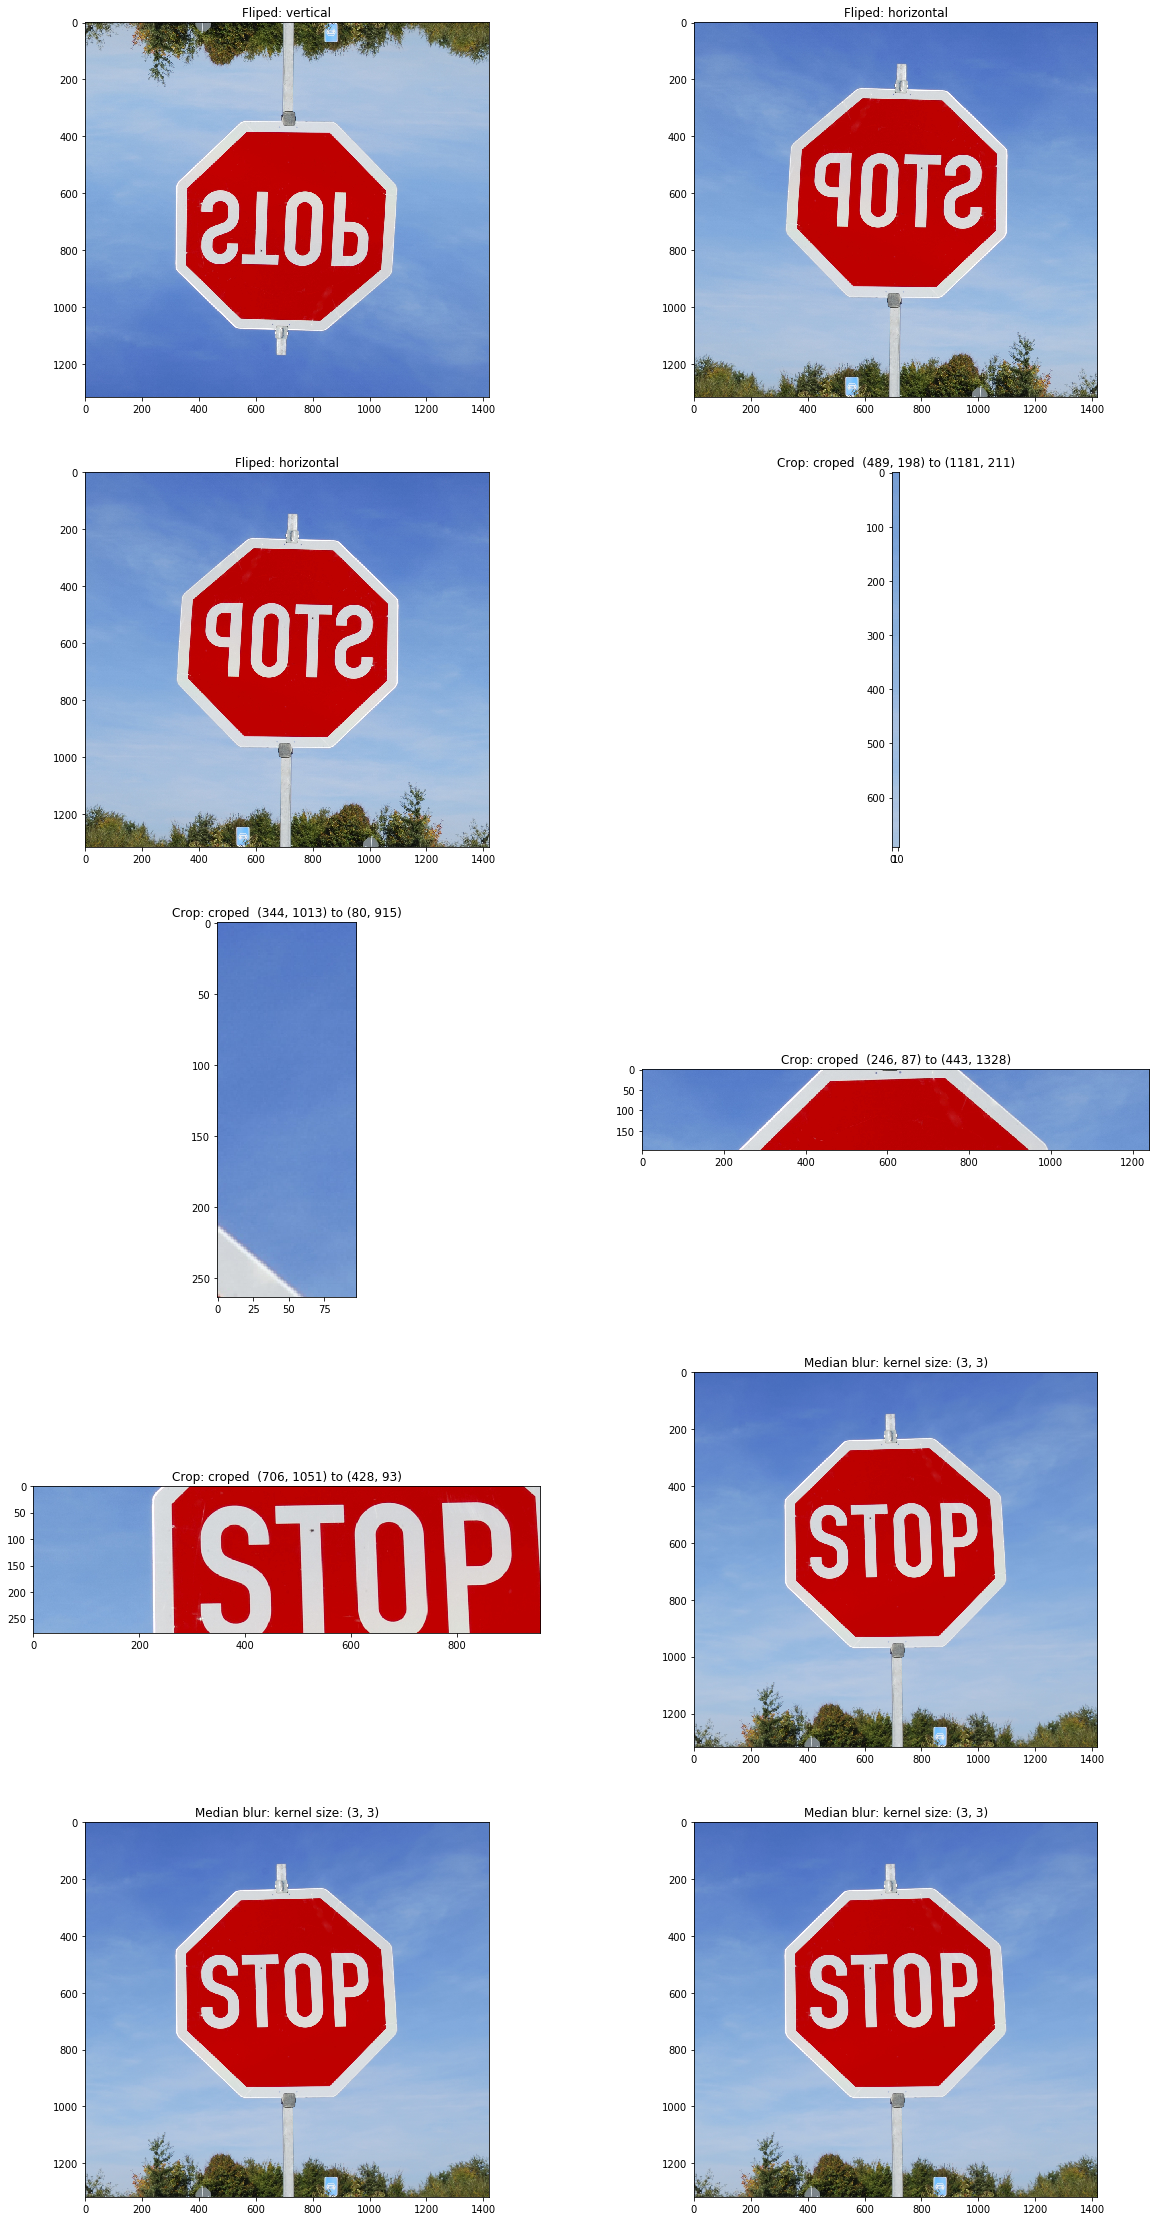

In [31]:
img = cv2.imread('stopsign.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
aug = augmentation_test_by_ratio(img, 3, [3, 4, 5])
gen = aug.generate(12)
subplot(5, 2, gen[0], gen[1])

# augmentation_test_by_weighted:
## N - number of augmentation
## M - probability to choose each augmentation (weighted)
### The function 'generate' will create as a new image by perform N augmentation with random select 

In [19]:
class augmentation_test_by_weighted(augmentation):      
    def __init__(self, image, N, M):
        self.image = image 
        self.weights = M
        self.augmentation_number = N
        inner_methods = ['cal_lenght', 'cal_boundary', 'Check_boundary']
        self.augmentations_list = [func for func in dir(augmentation) if callable(getattr(augmentation, func)) 
                        and not func.startswith("__") and func not in inner_methods ]
    
    def generate(self):

        image_augmentations = np.random.choice(self.augmentations_list, self.augmentation_number, replace = False, p=self.weights)
        temp = self.image.copy()
        detials = ''
        for image_augmentation in image_augmentations:
            temp, paramets = self.switchCase(temp, image_augmentation)
            detials +=paramets 
        return temp, detials

    def switchCase(self, img, augmentation_name):
        dic={'Flip': self.flip(img), 'Rotate': self.rotate(img),
                'GaussianBlur': self.gaussianBlur(img), 'MedianBlur': self.medianBlur(img),
                'Zoom': self.zoom(img), 'Crop': self.crop(img)}
        return dic.get(f'{str(augmentation_name)}')

    def flip(self, img):
        axis_vals = [-1, 0, 1]
        axis_val = random.choice(axis_vals)
        pic = super().Flip(img, axis_val)
        if axis_val == -1:
            paramters = f'Fliped: horizontal and vertical\n'
        if axis_val == 1:
            paramters = f'Fliped: horizontal\n'      
        if axis_val == 0:
            paramters = f'Fliped: vertical\n'
        return pic, paramters
        
    def rotate(self, img):
        degree_vals = np.arange(-360,360,10)
        resize_vals = ['True', 'False']
        degree_val = random.choice(degree_vals)
        resize_val = random.choice(resize_vals)
        if resize_val == 'True':
            resize_val = True
        else:
            resize_val = False

        pic = super().Rotate(img, degree_val, resize_val)
        paramters = f'Rotate: {degree_val} degrees resized: {resize_val}\n'

        return pic, paramters

    def gaussianBlur(self, img):
        kernel_vals = np.arange(3,5,2)
        sigma_vals = np.arange(1,10,1)
        kernel_val = random.choice(kernel_vals)
        sigma_val = random.choice(sigma_vals)
        ksize = (kernel_val, kernel_val)
        pic = super().GaussianBlur(img, ksize, sigma_val)
        paramters = f'Gaussian blur: kernel size: {ksize} and standard deviation: {sigma_val}\n'

        return pic, paramters

    def medianBlur(self, img):
        kernel_vals = np.arange(3,5,2)
        kernel_val = random.choice(kernel_vals)
        ksize = (kernel_val, kernel_val)
        pic = super().MedianBlur(img, kernel_val)
        paramters = f'Median blur: kernel size: {ksize}\n'

        return pic, paramters


    def zoom(self, img):
        h,w = img.shape[:2]
        hight_vals = np.arange(h)
        weidth_vals = np.arange(w)
        zoom_vals = np.arange(1,10,0.5)
        hight_val = random.choice(hight_vals)
        weidth_val = random.choice(weidth_vals)
        zoom_val = random.choice(zoom_vals)
        position = (hight_val, weidth_val)
        pic = super().Zoom(img, position, zoom_val)
        paramters = f'Zoom: zoomed by {zoom_val} on coordinate: {position}\n'

        return pic, paramters

    def crop(self, img):
        h,w = img.shape[:2]
        hight_vals = np.arange(h)
        weidth_vals = np.arange(w)
        hight_val = random.choices(hight_vals, k = 2)
        weidth_val = random.choices(weidth_vals, k = 2)
        start_position = (hight_val[0], weidth_val[0])
        end_position = (hight_val[1], weidth_val[1])
        pic = super().Crop(img, start_position, end_position)
        paramters = f'Crop: croped  {start_position} to {end_position}\n'

        return pic, paramters


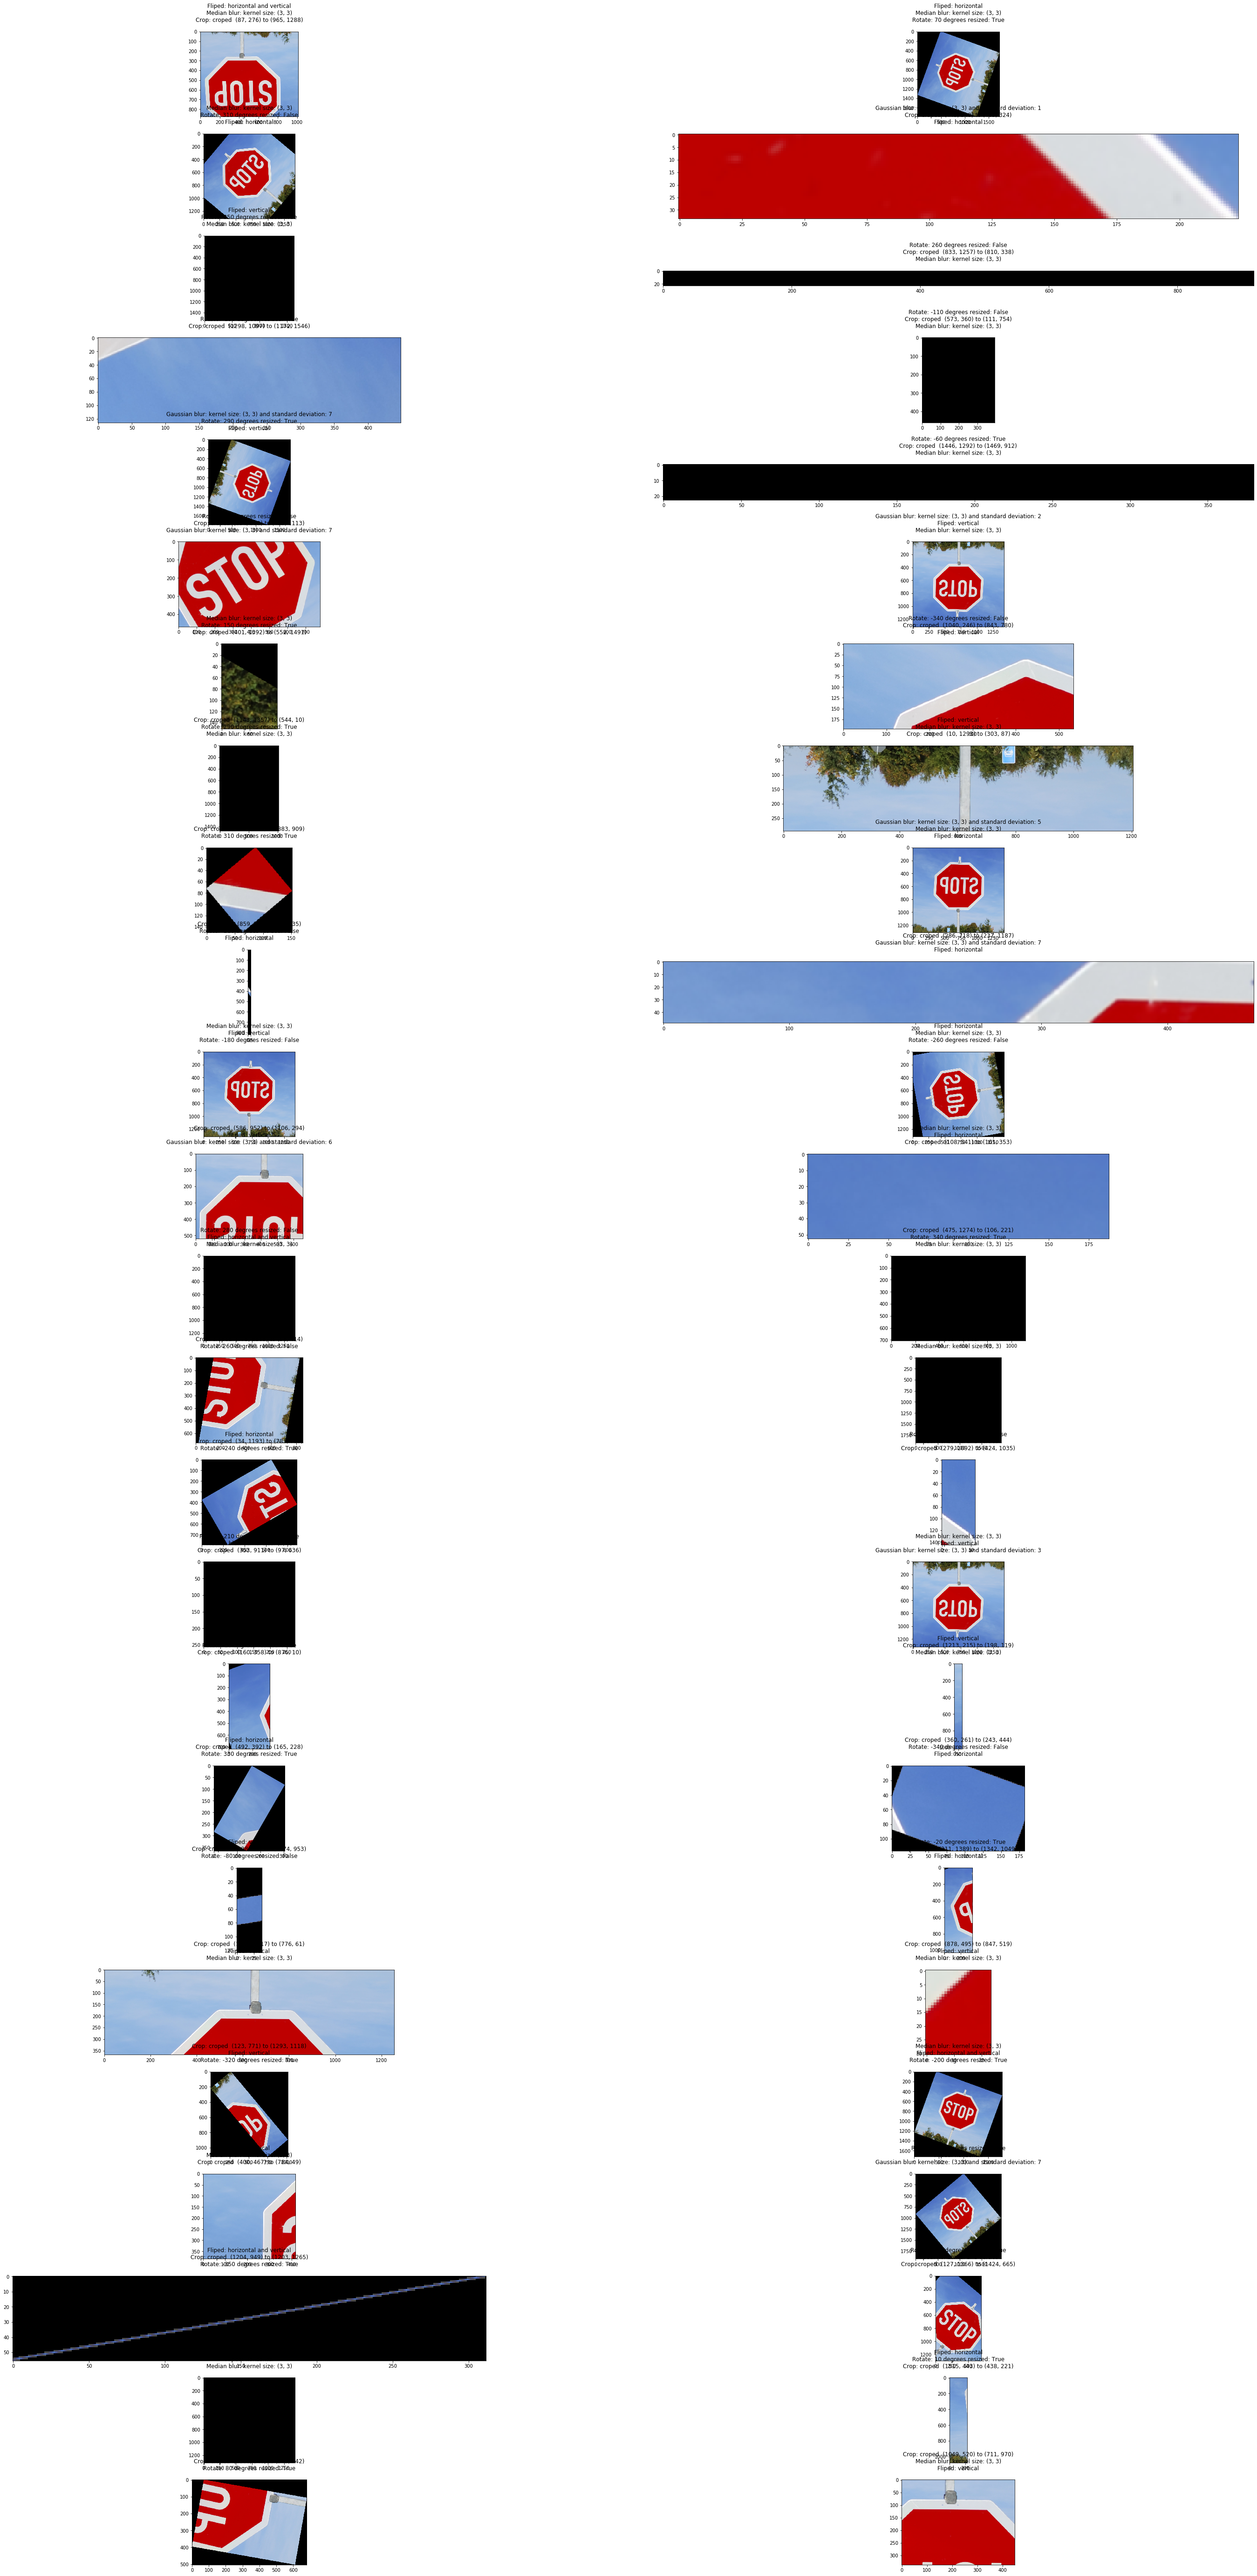

In [36]:
img = cv2.imread('stopsign.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
M = [0.3,0.3,0.1,0.1,0.2, 0.0]
N = 3
test = augmentation_test_by_weighted(img, N, M)
all_images = []
all_titles = []
for i in range(50):
    
    after_augmentation, details = test.generate()
    all_images.append(after_augmentation)
    all_titles.append(details)

plt.figure(figsize=[50 ,100])
for index,(pic,tit) in enumerate(zip(all_images, all_titles)):
    plt.subplot(25, 2, index+1)
    plt.title(tit)
    plt.imshow(pic)
plt.show()

